In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('https://github.com/yanov2708/DS/raw/main/test_data_analyst/%D0%A2%D0%B5%D1%81%D1%82%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.xlsx')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
df

,Рег. Менедж.,Магазин,Насел. Пункт,Магазины.Площадь торговая,Продажи UAH,Продажи шт,Ост всего UAH (начало месяца),Ост всего UAH (конец месяца),Ост всего шт (начало месяца),Ост всего шт (конец месяца)
0,РМ 1,Магазин 1,НП 1,40.0,153688,520,419214.6,410535.4,2577.0,2518.0
1,РМ 1,Магазин 2,НП 2,34.9,142252,608,310322.2,322126.2,2239.0,2206.0
2,РМ 1,Магазин 89,НП 1,45.0,111296,405,501723.4,523966.7,3321.0,3310.0
3,РМ 1,Магазин 4,НП 4,32.0,155765,557,301439.4,297430.6,2094.0,1994.0
4,РМ 2,Магазин 3,НП 3,60.0,129732,601,318961.0,332698.9,2052.0,1967.0
...,...,...,...,...,...,...,...,...,...,...
1706,РМ 2,Магазин 1704,НП 598,22.0,222177,843,515969.2,566785.8,3341.0,3359.0
1707,РМ 2,Магазин 1705,НП 600,28.0,128299,573,412186.7,504166.8,2811.0,3241.0
1708,РМ 19,Магазин 1706,НП 40,29.0,211777,758,441942.4,532171.6,3170.0,3419.0
1709,РМ 27,Магазин 1707,НП 601,40.0,106606,309,384698.4,445773.9,2974.0,3163.0


**Данные**:
 * `Продажи` - сумма продаж за месяц у магазина
 * `Продажи шт` - количество проданых шт в магазине за месяц
 * `Ост всего UAH (начало месяца)` - общая стоимость всего товара что есть у магазина в начале месяца
 * `Ост всего UAH (конец месяца)` - общая стоимость всего товара что есть 
 у магазина в конце месяца
 * `Ост всего шт (начало месяца)` - штук товара в начале месяца
 * `Ост всего шт (конец месяца) ` - иногда больше чем в начале месяца (товар привозят)

In [ ]:
# Количество пропусков по столбцам
df.isna().sum().sort_values(ascending=False)

Ост всего шт (конец месяца)      10
Ост всего UAH (конец месяца)      4
Ост всего шт (начало месяца)      4
Ост всего UAH (начало месяца)     3
Рег. Менедж.                      0
Магазин                           0
Насел. Пункт                      0
Магазины.Площадь торговая         0
Продажи UAH                       0
Продажи шт                        0
dtype: int64

In [ ]:
# Количество пропусков всего
df.isna().sum().sum()

21

In [ ]:
# строки с пропущенными значениями
df[df.isna().any(axis=1)]

,Рег. Менедж.,Магазин,Насел. Пункт,Магазины.Площадь торговая,Продажи UAH,Продажи шт,Ост всего UAH (начало месяца),Ост всего UAH (конец месяца),Ост всего шт (начало месяца),Ост всего шт (конец месяца)
89,РМ 4,Магазин 458,НП 22,70.0,15526,49,395935.3,NaN,2392.0,NaN
95,РМ 37,Магазин 1709,НП 66,150.0,208789,753,NaN,977380.7,NaN,5282.0
733,РМ 14,Магазин 733,НП 420,142.0,69153,463,692974.1,-0.3,4985.0,NaN
800,РМ 41,Магазин 800,НП 438,55.0,76616,269,317976.7,0.0,2057.0,NaN
899,РМ 27,Магазин 899,НП 45,35.0,1090,4,0.0,NaN,NaN,NaN
912,РМ 39,Магазин 912,НП 46,110.0,60001,117,857455.6,NaN,3661.0,NaN
931,РМ 26,Магазин 931,НП 139,54.0,13022,46,436846.4,0.0,2642.0,NaN
974,РМ 22,Магазин 974,НП 480,44.0,17115,64,527654.6,0.0,3484.0,NaN
1064,РМ 34,Магазин 1064,НП 49,114.0,69833,217,1017274.1,-0.0,4511.0,NaN
1095,РМ 17,Магазин 1095,НП 398,65.0,14151,37,199806.8,NaN,840.0,NaN


In [ ]:
# Количество магазинов с пропущенными значениями
len(df[df.isna().any(axis=1)])

13

In [ ]:
# Описательная статистика наших колонок
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Магазины.Площадь торговая,1711.0,61.8,25.3,0.0,45.0,60.0,73.0,300.0
Продажи UAH,1711.0,201779.0,94148.6,1090.0,139507.0,182318.0,241291.5,1004039.0
Продажи шт,1711.0,709.2,317.6,4.0,494.0,648.0,847.0,2541.0
Ост всего UAH (начало месяца),1708.0,502805.3,183482.0,0.0,372824.3,466851.2,596594.4,2613375.2
Ост всего UAH (конец месяца),1707.0,543582.2,207792.6,-0.3,402906.2,504124.5,637718.8,2946857.9
Ост всего шт (начало месяца),1707.0,3120.1,972.7,840.0,2437.0,2953.0,3608.5,10108.0
Ост всего шт (конец месяца),1701.0,3266.9,1040.2,598.0,2521.0,3079.0,3792.0,11251.0


Выше видим несколько странных значений:
* Минимальная площадь магазина = 0
* Ост всего UAH = 0 и -0,3

In [ ]:
# Посмотрим на строки с площадью магазина 0     (эту строку оставим)
df[df['Магазины.Площадь торговая'] == df['Магазины.Площадь торговая'].min()]

,Рег. Менедж.,Магазин,Насел. Пункт,Магазины.Площадь торговая,Продажи UAH,Продажи шт,Ост всего UAH (начало месяца),Ост всего UAH (конец месяца),Ост всего шт (начало месяца),Ост всего шт (конец месяца)
1203,РМ 43,Магазин 1201,НП 132,0.0,185584,717,349462.9,387771.1,2522.0,2655.0


In [ ]:
# Посмотрим на строки с Ост всего UAH (начало месяца) <= 0 и Ост всего UAH (конец месяца) <= 0
df[(df['Ост всего UAH (конец месяца)'] <= 0) | 
   (df['Ост всего UAH (начало месяца)'] <=0)]

,Рег. Менедж.,Магазин,Насел. Пункт,Магазины.Площадь торговая,Продажи UAH,Продажи шт,Ост всего UAH (начало месяца),Ост всего UAH (конец месяца),Ост всего шт (начало месяца),Ост всего шт (конец месяца)
733,РМ 14,Магазин 733,НП 420,142.0,69153,463,692974.1,-0.3,4985.0,NaN
1064,РМ 34,Магазин 1064,НП 49,114.0,69833,217,1017274.1,-0.0,4511.0,NaN
1139,РМ 16,Магазин 1139,НП 510,50.0,9138,36,262046.1,-0.0,1273.0,NaN


**Видим что они совпадают с теми где у нас есть пропуски, удалим такие строки поскольку к сожалению восстановить информацию не можем**

In [ ]:
df.shape

(1711, 10)

In [ ]:
indices_to_del = df[df.isna().any(axis=1)].index
df.drop(indices_to_del, inplace=True)

In [ ]:
df.shape

(1698, 10)

In [ ]:
df.describe().T #Теперь статистики смотрятся правдоподобнее

,count,mean,std,min,25%,50%,75%,max
Магазины.Площадь торговая,1698.0,61.7,25.1,0.0,45.0,60.0,73.0,300.0
Продажи UAH,1698.0,202924.0,93457.8,49914.0,140428.2,182768.0,241614.5,1004039.0
Продажи шт,1698.0,713.2,315.0,166.0,497.0,651.0,849.8,2541.0
Ост всего UAH (начало месяца),1698.0,502993.8,182607.7,180099.0,373291.3,467171.6,596280.7,2613375.2
Ост всего UAH (конец месяца),1698.0,545371.8,205493.1,70125.3,403763.4,504201.7,638738.8,2946857.9
Ост всего шт (начало месяца),1698.0,3121.4,970.3,1218.0,2439.2,2954.0,3607.8,10108.0
Ост всего шт (конец месяца),1698.0,3266.3,1039.5,598.0,2521.0,3079.0,3791.8,11251.0


In [ ]:
#Проверим пропуски еще раз
df.isna().sum().sort_values(ascending=False)

Рег. Менедж.                     0
Магазин                          0
Насел. Пункт                     0
Магазины.Площадь торговая        0
Продажи UAH                      0
Продажи шт                       0
Ост всего UAH (начало месяца)    0
Ост всего UAH (конец месяца)     0
Ост всего шт (начало месяца)     0
Ост всего шт (конец месяца)      0
dtype: int64

In [ ]:
#Также все эти действия повторил в екселе

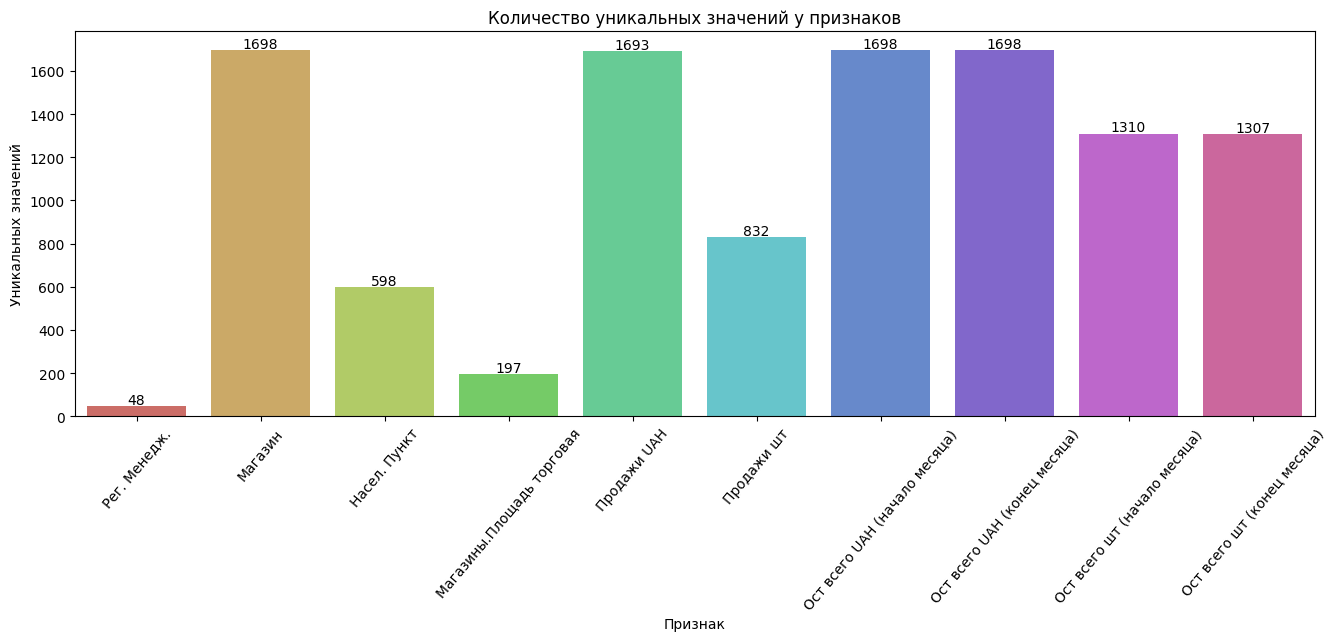

In [ ]:
plt.figure(figsize=(16, 5))

cols = df.columns
uniques = [len(df[col].unique()) for col in cols]

ax = sns.barplot(x=cols, y=uniques, palette='hls', log=False)
ax.set(xlabel='Признак', ylabel='Уникальных значений', title='Количество уникальных значений у признаков')


for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x() + p.get_width()/2.,
            uniq + 10,
            uniq,
            ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

Уникальных магазинов столько же сколько и записей в файле

In [ ]:
df.head()

,Рег. Менедж.,Магазин,Насел. Пункт,Магазины.Площадь торговая,Продажи UAH,Продажи шт,Ост всего UAH (начало месяца),Ост всего UAH (конец месяца),Ост всего шт (начало месяца),Ост всего шт (конец месяца)
0,РМ 1,Магазин 1,НП 1,40.0,153688,520,419214.6,410535.4,2577.0,2518.0
1,РМ 1,Магазин 2,НП 2,34.9,142252,608,310322.2,322126.2,2239.0,2206.0
2,РМ 1,Магазин 89,НП 1,45.0,111296,405,501723.4,523966.7,3321.0,3310.0
3,РМ 1,Магазин 4,НП 4,32.0,155765,557,301439.4,297430.6,2094.0,1994.0
4,РМ 2,Магазин 3,НП 3,60.0,129732,601,318961.0,332698.9,2052.0,1967.0


In [ ]:
df.to_csv("test_clean_data.csv")  #Скачаем данные валидного формата(без пропусков и странных значений), будем использовать для построения дашборда 

In [ ]:
# Посмотрим на распределения 

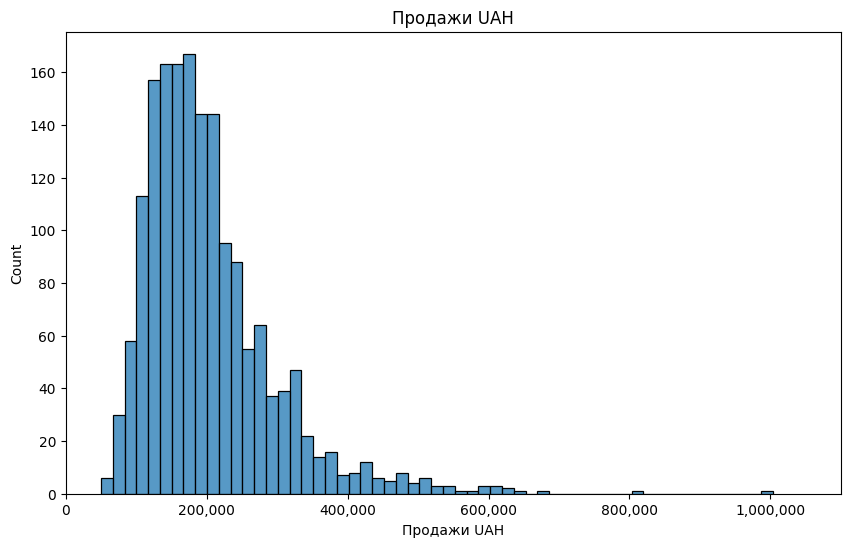

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.histplot(df['Продажи UAH'])
plt.title('Продажи UAH', fontsize=12)


xticks = ax.get_xticks()
xtick_labels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
xlim = (0, ax.get_xlim()[1]-100000)
ax.set_xlim(xlim)

plt.show()

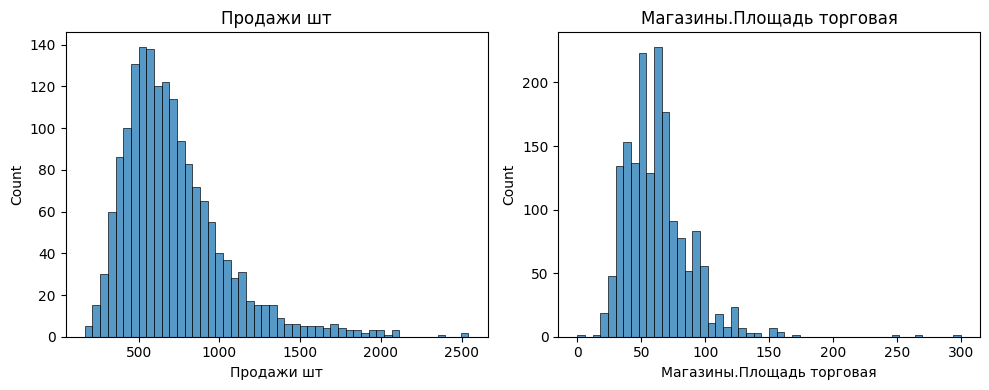

In [ ]:
plt.figure(figsize=(10,4))
cols = ['Продажи шт', 'Магазины.Площадь торговая']

for i in range(1,3):
    col_name = cols[i-1]
    plt.subplot(1,2,i)

    sns.histplot(df[col_name], bins=50)
    plt.title(f'{col_name}')

plt.tight_layout()
plt.show()

Наблюдаем несколько экстремальных значений

In [ ]:
#Группировка по Рег. Менедж., считаем сумму Продаж
df.groupby('Рег. Менедж.', as_index=False).agg({'Продажи UAH': 'sum'}).sort_values('Продажи UAH', ascending=False)

,Рег. Менедж.,Продажи UAH
47,РМ 9,11518229
17,РМ 25,10849209
37,РМ 43,10315973
13,РМ 21,10004910
38,РМ 44,9362103
9,РМ 18,9065604
7,РМ 16,8933093
8,РМ 17,8790583
40,РМ 46,8682908
3,РМ 12,8495176
